In [1]:
print('--------------------')
print('Started...')
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import os, sys

import matplotlib.pyplot as plt

import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import xgboost as xgb
from sklearn.model_selection import train_test_split


print('-= Ended =-')
print('--------------------')

--------------------
Started...
-= Ended =-
--------------------


In [2]:
URL = 'Intraday.txt'
# URL = 'dummy.txt'

frame = pd.read_table(
    URL,

    # Uncomment if the file needs to be decompressed
    #compression='gzip',
    #compression='bz2',

    # Specify the file encoding
    # Latin-1 is common for data from US sources
    #encoding='latin-1',
    encoding='utf-8',  # UTF-8 is also common

    # Specify the separator in the data
    #sep=',',            # comma separated values
    sep='\t',          # tab separated values
    #sep=' ',           # space separated values

    # Ignore spaces after the separator
    skipinitialspace=True,

    # Generate row labels from each row number
    index_col=None,
    #index_col=0,       # use the first column as row labels
    #index_col=-1,      # use the last column as row labels

    # Generate column headers row from each column number
    #header=None,
    header=0,          # use the first line as headers

    # Use manual headers and skip the first row in the file
    #header=0,
    #names=['col1', 'col2', ...],

    # # parse first column 'Sat' as date
    parse_dates=['Sat'],

    # Character to recognize as decimal point (e.g. use ‘,’ for European data).
    #decimal = '.'
    #decimal = ','
)
# for some reason, there is a 25th hour -> drop it
frame = frame[frame.columns[:-1]]
print('-= Ended =-')
print('--------------------')



-= Ended =-
--------------------


In [29]:
frame.head(10)

,Sat,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,2023-05-31,"84,08","76,93","76,02","82,96","82,04","84,82","99,67","108,12","95,6",...,"54,22","57,95","77,98","104,86","103,4","117,24","141,14","113,84","105,57","97,19"
1,2023-05-30,"86,13","80,85","70,67","75,6","75,31","87,27","105,51","114,49","113,14",...,"87,23","107,66","108,74","100,6","116,75","141,22","152,14","131,75",120,"90,27"
2,2023-05-29,"20,8","27,7","27,97","26,34","14,86","37,61","35,76","41,9","30,41",...,"8,19","34,03","26,77","92,68","106,25","98,17","121,21","102,76","88,93","77,16"
3,2023-05-28,"80,22","69,7","69,6","63,39","63,78","63,03","56,34","19,33","13,73",...,"-44,02","-47,71","-6,02","0,32","55,69","70,11","71,52","72,95","71,26","58,2"
4,2023-05-27,"79,85","79,62","75,93","74,66","76,08","68,76","66,1","61,87","58,63",...,"-10,17","-2,41","-0,35","44,92","88,74","92,22","130,66","104,19","93,79","85,8"
5,2023-05-26,"78,87","62,42","54,14","51,28","51,44","75,06","92,78","89,56","94,02",...,"12,84","27,97","40,57","79,4","85,69","98,83","115,81","108,98","96,74","85,16"
6,2023-05-25,"95,04","85,17","86,5","77,9","80,95","86,79","105,49","105,97","97,72",...,"64,59","41,22","66,47","83,35","102,36","119,15","118,62","126,76","103,66","90,44"
7,2023-05-24,"95,76","86,89","78,94","68,45","75,52","56,68","110,27","118,68","127,32",...,"82,15","77,28","87,62","106,48","112,46","129,85","147,01","143,66","108,75","102,47"
8,2023-05-23,"62,52","69,11","65,46","56,12","32,39","94,96","118,69","119,22","81,73",...,"57,89","80,8","95,07","103,95","117,14","147,01","157,31","124,37","107,3",101
9,2023-05-22,"87,43","84,85","80,1","78,37","79,89","89,31","91,31","103,86","89,8",...,"58,15","64,32","73,48","101,02","113,93","132,3","157,86","128,11","110,9","94,2"


In [3]:
# frame.to_csv(
#     'Intraday_No25thColumn.csv',
#     sep='\t',
#     index=False,
#     )

In [4]:
df_temp = (
    frame.set_index("Sat") # makes the 'date' column the index
    .stack()               # stacks
    .reset_index()
    .rename(columns={"Sat": "date", "level_1": "hour", 0: "electric_price"})
)

# change comma for dot and convert electric_price from string to float
df_temp['electric_price'] = df_temp['electric_price'].str.replace(',', '.')
df_temp['electric_price'] = pd.to_numeric(df_temp['electric_price'], errors='coerce')

print('-= Ended =-')
print('--------------------')

-= Ended =-
--------------------


In [5]:
data = pd.DataFrame(columns =['year', 'month', 'day', 'day_name', 'hour', 'price'])

for i in range(len(df_temp)):
    data.loc[len(data.index)] = [df_temp['date'][i].year,
                                 df_temp['date'][i].month,
                                 df_temp['date'][i].day,
                                 df_temp['date'][i].day_name(),
                                 df_temp['hour'][i],
                                 df_temp['electric_price'][i]]
print(data)

### For some reason it loops to inf (or need to looong) for Intraday.txt - but it works on my computer xD ###
print('-= Ended =-')
print('--------------------')

       year  month  day   day_name hour  price
0      2023      5   31  Wednesday    1  84.08
1      2023      5   31  Wednesday    2  76.93
2      2023      5   31  Wednesday    3  76.02
3      2023      5   31  Wednesday    4  82.96
4      2023      5   31  Wednesday    5  82.04
...     ...    ...  ...        ...  ...    ...
26203  2020      6    4   Thursday   20  39.63
26204  2020      6    4   Thursday   21  38.55
26205  2020      6    4   Thursday   22  29.96
26206  2020      6    4   Thursday   23  24.12
26207  2020      6    4   Thursday   24  18.46

[26208 rows x 6 columns]
-= Ended =-
--------------------


In [6]:
filtered_data = data.loc[((data.year == 2023) & (data.month == 5) & (data.day <= 31)), ['day', 'day_name', 'hour', 'price']]
#print(custom_data)

print('-= Ended =-')
print('--------------------')

-= Ended =-
--------------------


In [30]:
plot_data = filtered_data
plot_data.head(10)

,day,day_name,hour,price
0,31,Wednesday,1,84.08
1,31,Wednesday,2,76.93
2,31,Wednesday,3,76.02
3,31,Wednesday,4,82.96
4,31,Wednesday,5,82.04
5,31,Wednesday,6,84.82
6,31,Wednesday,7,99.67
7,31,Wednesday,8,108.12
8,31,Wednesday,9,95.60
9,31,Wednesday,10,91.19


In [8]:
sns.set_theme(style="darkgrid")
sns.color_palette()

print('-= Ended =-')
print('--------------------')

-= Ended =-
--------------------


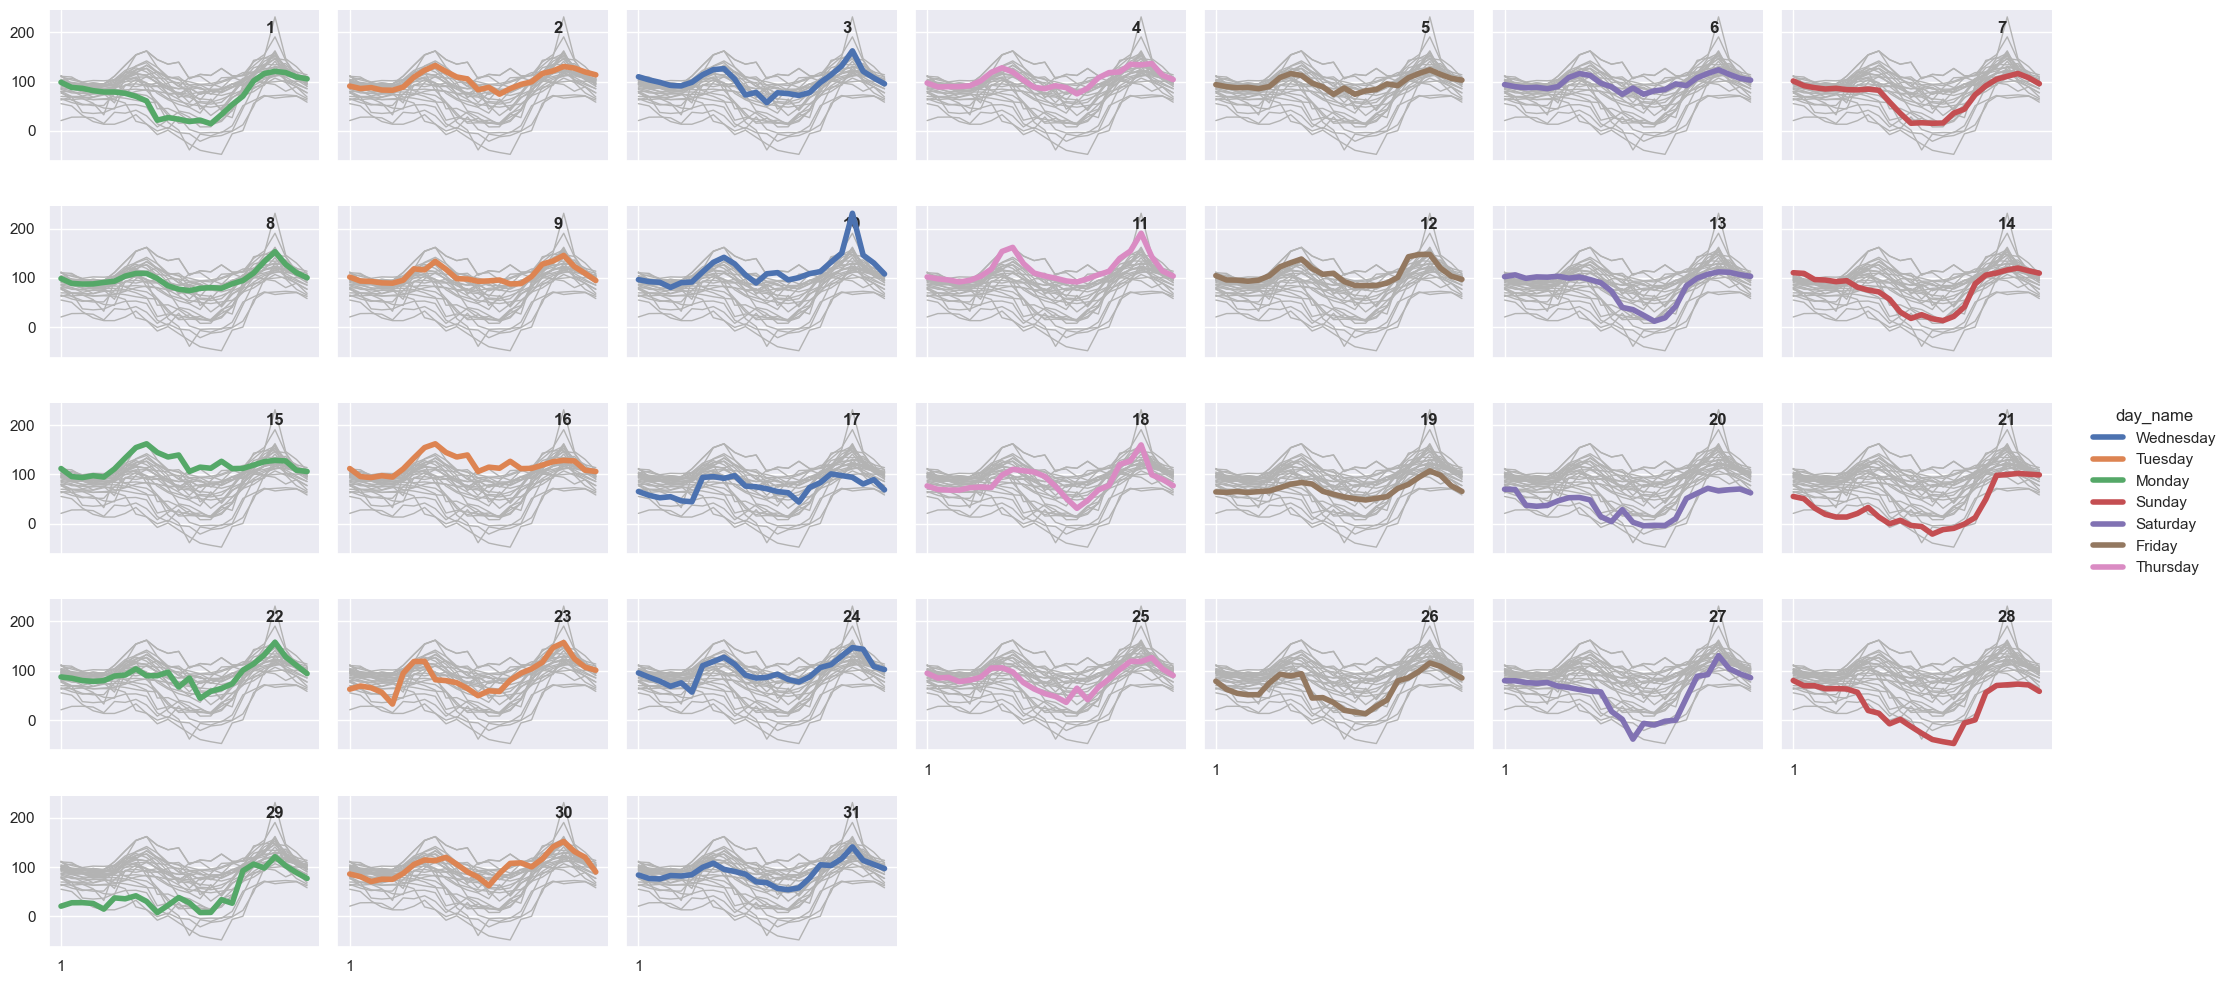

In [9]:
# Plot each year's time series in its own facet
g = sns.relplot(
    data=plot_data,
    x="hour", y="price", col="day", hue="day_name",
    kind="line", linewidth=4, zorder=5,
    col_wrap=7, height=2, aspect=1.5, legend=True,
)

# Iterate over each subplot to customize further
for day, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, day, transform=ax.transAxes, fontweight="bold")

    # Plot every hour's time series in the background
    sns.lineplot(
        data=plot_data, x="hour", y="price", units="day",
        estimator=None, color=".7", linewidth=1, ax=ax, legend=False
    )

    # Reduce the frequency of the x axis ticks
    ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "")
g.tight_layout()
plt.show()

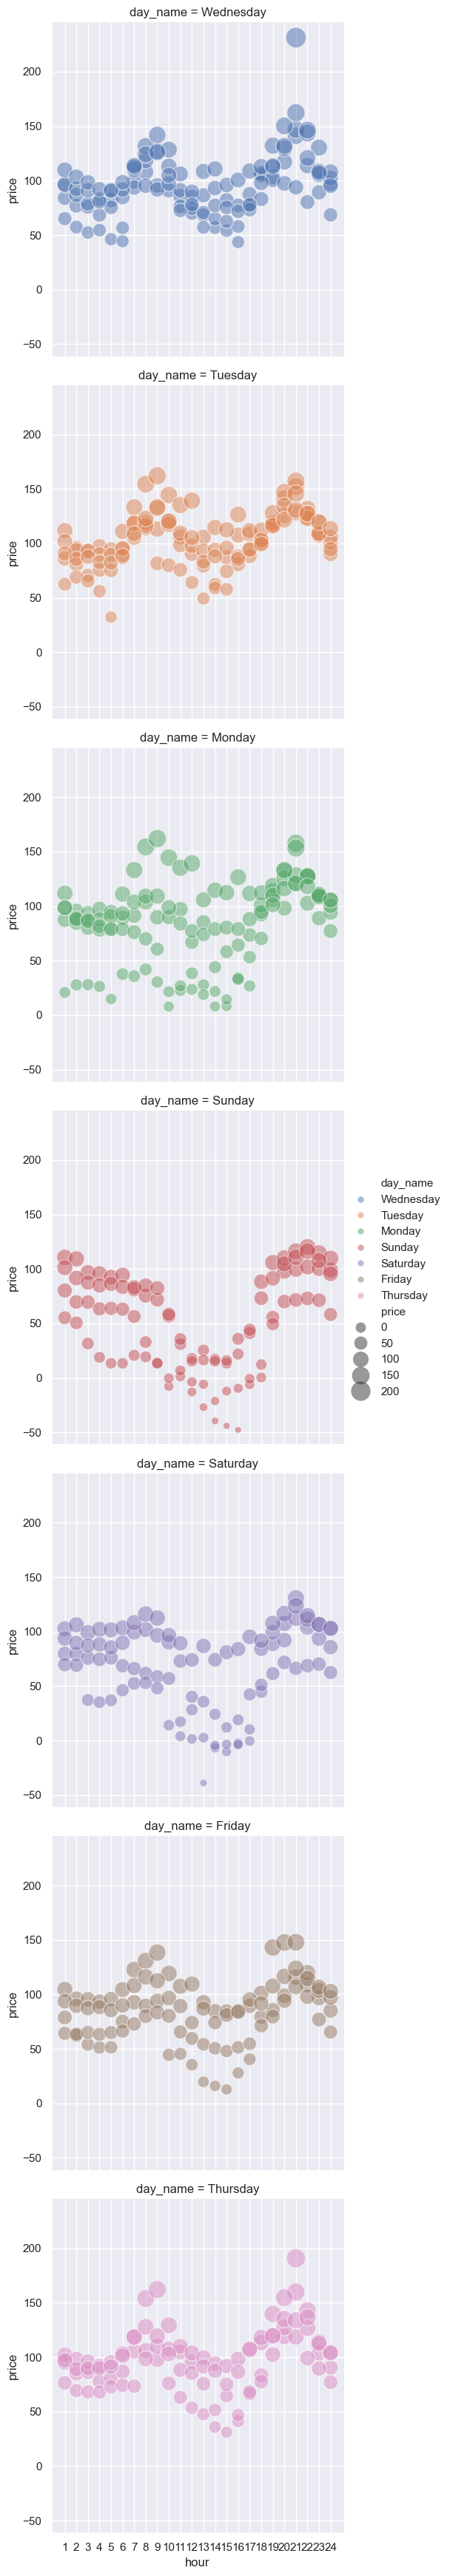

In [10]:
sns.relplot(x="hour", y="price", hue="day_name", size="price",
            sizes=(40, 400), alpha=.5, row="day_name",
            height=5, data=plot_data)
plt.show()

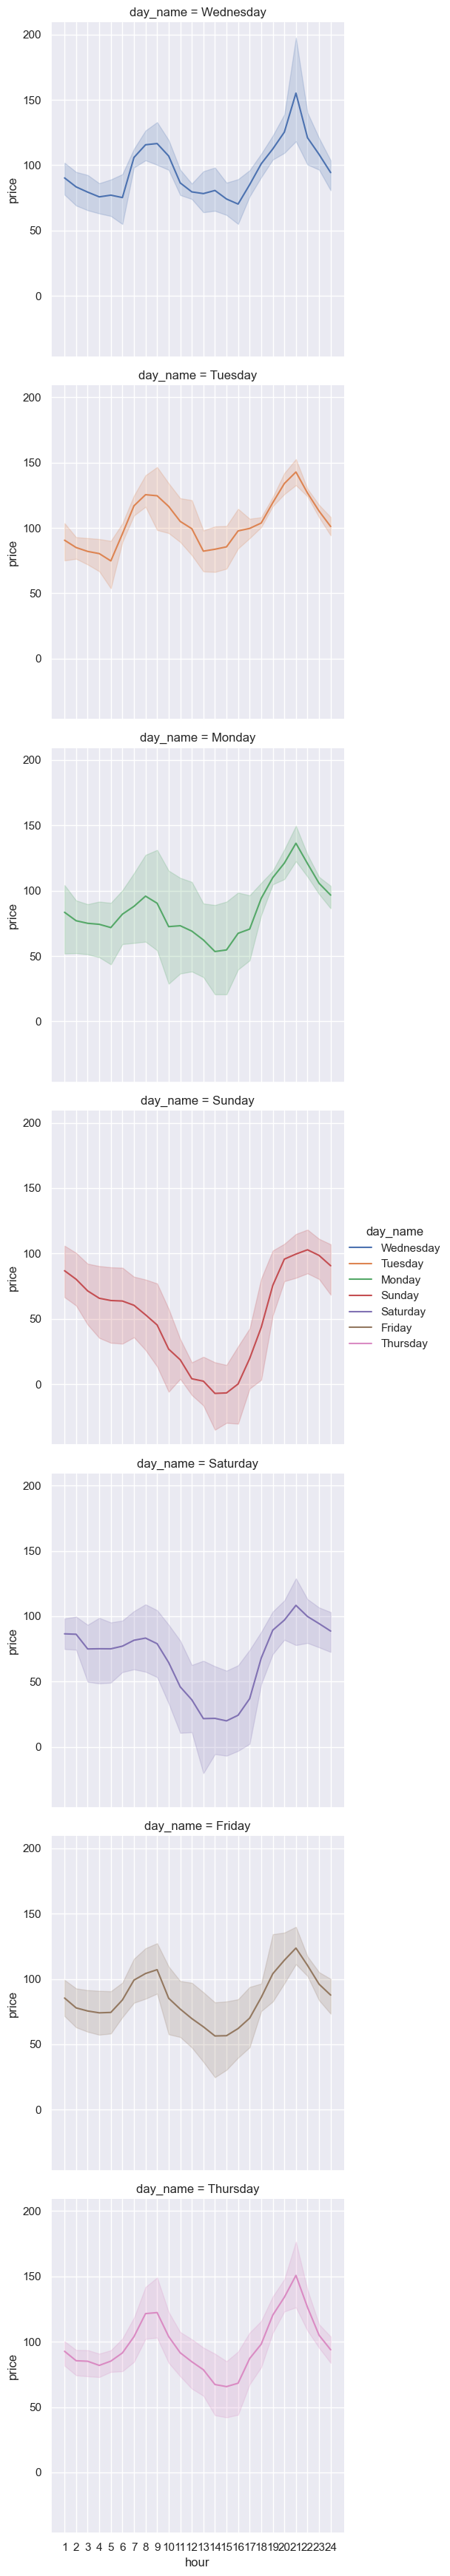

In [11]:
sns.relplot(
    data=plot_data, x="hour", y="price", row="day_name",
    hue="day_name", kind="line",
)
plt.show()

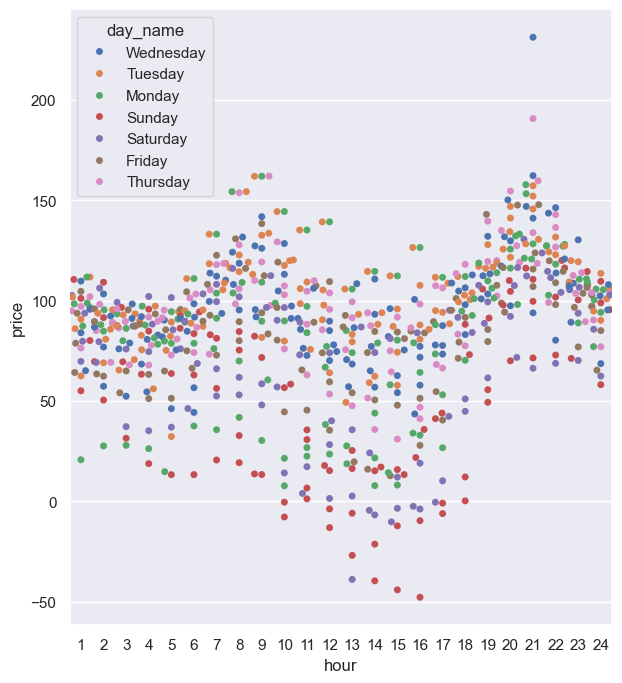

In [36]:
plt.figure(figsize=(7, 8))

sns.swarmplot(data=plot_data, x="hour", y="price", hue="day_name")
plt.show()

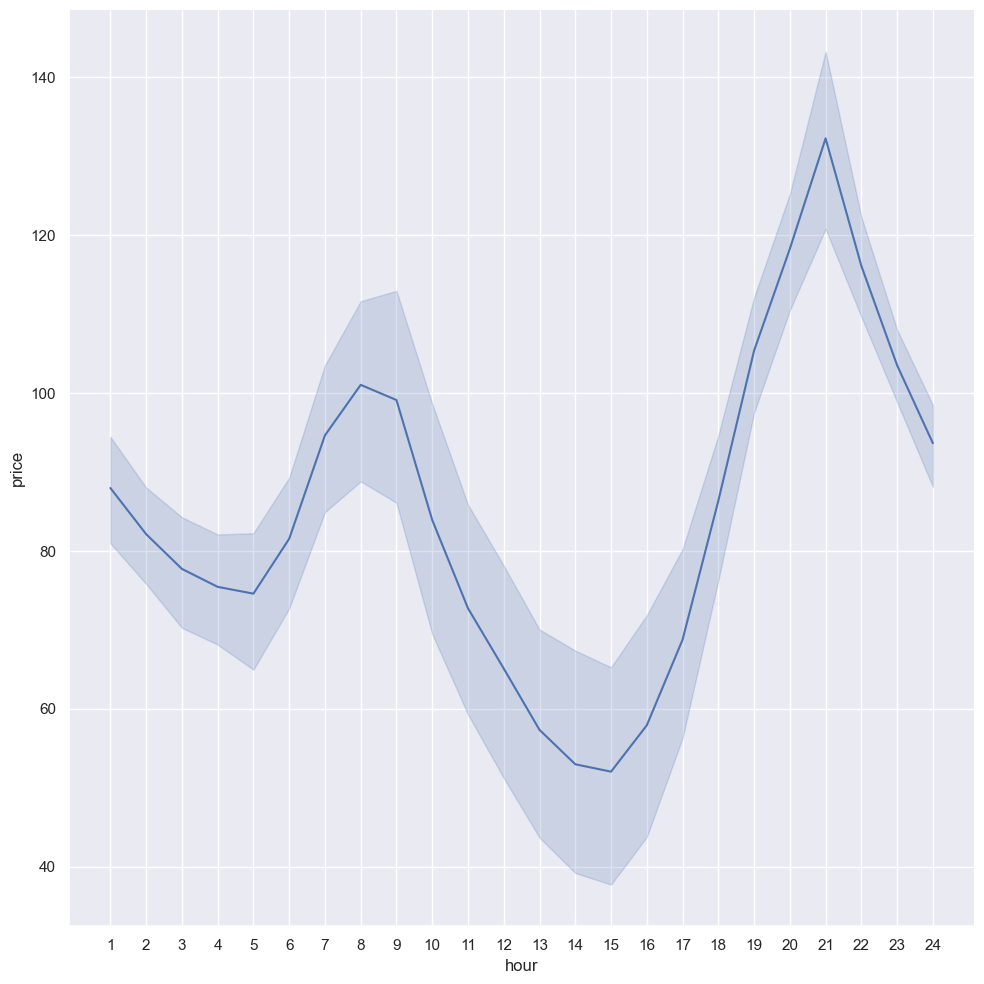

-= Ended =-
--------------------


In [13]:
sns.relplot(
    data=plot_data, x="hour", y="price", kind="line", height=10
)
plt.show()

print('-= Ended =-')
print('--------------------')

## Plotly

In [14]:
# Scatter plot of price by hour with day as color
fig = px.scatter(plot_data, x='hour', y='price', color='day_name', title='Price by Hour with Day as Color')
fig.show()

In [15]:
import plotly.express as px

# Box plot of price distribution by day
fig = px.box(plot_data, x='day_name', y='price', title='Price Distribution by Day')
fig.show()

In [16]:
# Violin plot of price distribution by day
fig = px.violin(plot_data, x='day_name', y='price', box=True, points='all', title='Price Distribution by Day')
fig.show()

In [17]:
# Box plot of price by hour for each day
fig = px.box(plot_data, x='hour', y='price', color='day_name', title='Box Plot of Price by Hour for Each Day')
fig.show()

In [18]:
# Pivot the data to create a matrix for the heatmap
heatmap_data = plot_data.pivot_table(values='price', index='day_name', columns='hour', aggfunc='mean') # Create the heatmap
heatmap_data = heatmap_data.reindex(columns=heatmap_data.columns.astype(int).sort_values().astype(str))

fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    colorscale='Viridis'
))
fig.update_layout(title='Heatmap of Average Price by Hour and Day', xaxis_title='Hour', yaxis_title='Day')
fig.show()

In [19]:
# Bar plot of average price by day
avg_price_by_day = plot_data.groupby('day_name')['price'].mean().reset_index()
fig = px.bar(avg_price_by_day, x='day_name', y='price', title='Average Price by Day')
fig.show()

In [20]:
# Histogram of price distribution
fig = px.histogram(plot_data, x='price', nbins=30, title='Price Distribution')
fig.show()

In [50]:
avg_price_by_hour_day

,day_name,hour,price
0,Friday,1,85.4175
120,Tuesday,1,90.6300
48,Saturday,1,86.5225
24,Monday,1,83.4860
144,Wednesday,1,90.2740
...,...,...,...
71,Saturday,9,78.9825
119,Thursday,9,122.3100
47,Monday,9,90.4200
95,Sunday,9,45.3075


In [49]:
# Calculate average price by hour for each day
avg_price_by_hour_day = plot_data.groupby(['day_name', 'hour'])['price'].mean().reset_index()
avg_price_by_hour_day = avg_price_by_hour_day.sort_values(by='hour')
# Line plot of average price by hour for each day
fig = px.line(avg_price_by_hour_day, x='hour', y='price', color='day_name', title='Average Price by Hour for Each Day')
fig.show()

In [22]:
data_df = data.copy()
data_df

,year,month,day,day_name,hour,price
0,2023,5,31,Wednesday,1,84.08
1,2023,5,31,Wednesday,2,76.93
2,2023,5,31,Wednesday,3,76.02
3,2023,5,31,Wednesday,4,82.96
4,2023,5,31,Wednesday,5,82.04
...,...,...,...,...,...,...
26203,2020,6,4,Thursday,20,39.63
26204,2020,6,4,Thursday,21,38.55
26205,2020,6,4,Thursday,22,29.96
26206,2020,6,4,Thursday,23,24.12


In [23]:
data_df['timestamp'] = pd.to_datetime(
    data_df['year'].astype(str) + '-' + data_df['month'].astype(str) + '-' + data_df['day'].astype(str) + ' ' + (data_df['hour'].astype(int)-1).astype(str) + ':00:00', 
    format='%Y-%m-%d %H:%M:%S'
    )
data_df = data_df.set_index('timestamp').sort_index()
data_df

,year,month,day,day_name,hour,price
timestamp,,,,,,
2020-06-04 00:00:00,2020,6,4,Thursday,1,23.22
2020-06-04 01:00:00,2020,6,4,Thursday,2,24.24
2020-06-04 02:00:00,2020,6,4,Thursday,3,22.85
2020-06-04 03:00:00,2020,6,4,Thursday,4,22.82
2020-06-04 04:00:00,2020,6,4,Thursday,5,21.42
...,...,...,...,...,...,...
2023-05-31 19:00:00,2023,5,31,Wednesday,20,117.24
2023-05-31 20:00:00,2023,5,31,Wednesday,21,141.14
2023-05-31 21:00:00,2023,5,31,Wednesday,22,113.84


In [24]:
# Drop the columns that are no longer needed (for XGBoost)
data_df = data_df.drop(columns=['year', 'month', 'day', 'day_name', 'hour'])
data_df.head(10)

,price
timestamp,
2020-06-04 00:00:00,23.22
2020-06-04 01:00:00,24.24
2020-06-04 02:00:00,22.85
2020-06-04 03:00:00,22.82
2020-06-04 04:00:00,21.42
2020-06-04 05:00:00,24.24
2020-06-04 06:00:00,25.00
2020-06-04 07:00:00,NaN
2020-06-04 08:00:00,NaN


### Explanation of XGBoost

XGBoost (Extreme Gradient Boosting) is a powerful and efficient implementation of the gradient boosting framework. 
It is widely used for supervised learning tasks, including regression, classification, and ranking. Here are some key points about XGBoost:

   - **Gradient Boosting**: XGBoost is based on the gradient boosting algorithm, which builds an ensemble of decision trees sequentially. Each tree corrects the errors of the previous ones, improving the overall model performance.
      - This is inherent in the XGBRegressor model used in the example.

   - **Regularization**: XGBoost includes L1 (Lasso) and L2 (Ridge) regularization to prevent overfitting, making it more robust compared to other boosting algorithms.
      - Specific regularization parameters are not explicitly set in the example, they are part of the model's default behavior.

   - **Parallel Processing**: XGBoost supports parallel processing, which speeds up the training process significantly.
      - This feature is utilized implicitly when training the model with model.fit(X_train, y_train).

   - **Handling Missing Values**: XGBoost can handle missing values internally, making it easier to work with real-world datasets.

   - **Tree Pruning**: XGBoost uses a technique called "max depth" to prune trees, which helps in controlling the complexity of the model.
      - The example does not explicitly set the max_depth parameter, but it is part of the model's default behavior.

   - **Cross-Validation**: XGBoost has built-in support for cross-validation, allowing for better model evaluation and hyperparameter tuning
      - The example does not explicitly use cross-validation,

   

We create lag features to use as predictors.

Lag features are previous values of the time series that help the model understand temporal dependencies.



In [25]:
# Create lag features
def create_lag_features(df, lag=1):
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = df['price'].shift(i)
    return df

# Create lag features
lag = 3
data_df = create_lag_features(data_df, lag)
data_df.dropna(inplace=True)

# Split the data into training and testing sets
X = data_df.drop(columns=['price'])
y = data_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [26]:
# Train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
# Make predictions
forecast = model.predict(X_test)

In [28]:
# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'timestamp': X_test.index, 'forecast': forecast})

# Plot the original prices and the forecast
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_df.index, y=data_df['price'], mode='lines', name='Original Price'))
fig.add_trace(go.Scatter(x=forecast_df['timestamp'], y=forecast_df['forecast'], mode='lines', name='Forecast'))
fig.update_layout(title='XGBoost Forecast')
fig.show()